In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from astro310Copy1 import *

#plot_defaults()

In [2]:
starH = read_history('ezweb_03058.zip')

help(read_history)

Help on function read_history in module astro310Copy1:

read_history(filename)
    Read history data from an EZ-Web output zip file
    
    Parameters
    ----------
    
    filename : string giving name of zip file
    
    Returns
    -------
    
    data: dictionary containing the history data. The following keys/values 
          appear in the dictionary:
    
        i         step index (gives index of corresponding profile)
        t         age (years)
        M         mass (Msun)
        log_L     log10(luminosity / Lsun)
        log_R     lop10(radius / Rsun)
        logT_s    log10(surface temperature / K)
        log_T_c   log10(central temprature / K)
        log_rho_c log10(central density / kg/m^3)
        log_P_c   log10(central pressure / N/m^2)
        Psi_c     central electron degeneracy parameter
        X_c       central hydrogen mass fraction
        Y_c       central helium mass fraction
        X_Cc      central carbon mass fraction
        X_Nc      centra

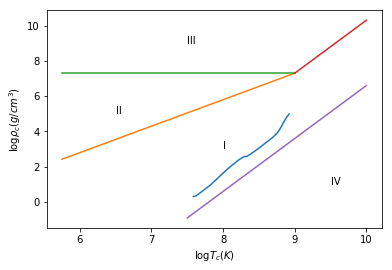

In [3]:
x1 = np.linspace(5.75, 9, 100)
x2 = np.linspace(9, 10, 100)
x3 = np.linspace(7.5, 10, 100)
y = []
y[:] = [7.3 for x in x1]

fig = plt.figure()
ax = fig.add_subplot(111)

Pc = 10**(starH['log_rho_c']) * 0.001 #unit conversion
Pc2 = np.log10(Pc)

plt.plot(starH['log_T_c'], Pc2) #blue
plt.plot(x1, ((1.5*x1)-6.2)) #orange
ax.annotate('I', xy=(8, 3), xycoords='data')
plt.plot(x1, y) #green
ax.annotate('II', xy=(6.5, 5), xycoords='data')
plt.plot(x2, (3*x2)-19.7) #red
ax.annotate('III', xy=(7.5, 9), xycoords='data')
plt.plot(x3, (3*x3)-23.4) #purple
ax.annotate('IV', xy=(9.5, 1), xycoords='data')
plt.xlabel(r'log$T_c(K)$')
plt.ylabel(r'log$\rho_c(g/cm^{3})$')
plt.show()

1) At the beginning of the EZ-Web calculations, the star is in section I of the graph which corresponds to ideal gas pressure being the dominant pressure given by the formula $P = RT\rho/\mu$.

2) The end of the calculations also ends in section I of the graph, again corresponding to ideal gas pressure being the dominant pressure. 

3) The star does go into the helium burning phase through $3\alpha$ reaction. The threshold for this burning can be seen on the graph as almost a vertical line on $x \approx 8.3$. The calculations pass through this line in section I of the graph. There is no helium flash due to the mass of the star being greater than $2M_\odot$. The flash would occur around the middle of its $3\alpha$ luminosities, but is absent as seen in the graph below.

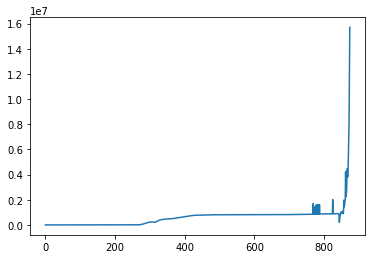

In [4]:
plt.plot(starH['L_3a'])
plt.show()

4) The star follows ideal gas behavior for all of the EZ-Web calculations. It follows a relatively straight line as given in the equation $log\rho_c \approx 3logT_c + C$. This can also be seen as the line stays within section I which is dominated by ideal gas pressure. 

5) This star is considered a massive star as it is above $8M\odot$. This means that star will quickly run out of hydrogen fuel then later become a supermassive red giant. The star will begin to fuse to heavier elements, run out of fuel, and the pressures will become inadequite to balance the force of gravity and cause a supernova, resulting in a black hole or neutron star.

In [5]:
sunH = read_history('ezweb_sun.zip')

help(read_history)

Help on function read_history in module astro310Copy1:

read_history(filename)
    Read history data from an EZ-Web output zip file
    
    Parameters
    ----------
    
    filename : string giving name of zip file
    
    Returns
    -------
    
    data: dictionary containing the history data. The following keys/values 
          appear in the dictionary:
    
        i         step index (gives index of corresponding profile)
        t         age (years)
        M         mass (Msun)
        log_L     log10(luminosity / Lsun)
        log_R     lop10(radius / Rsun)
        logT_s    log10(surface temperature / K)
        log_T_c   log10(central temprature / K)
        log_rho_c log10(central density / kg/m^3)
        log_P_c   log10(central pressure / N/m^2)
        Psi_c     central electron degeneracy parameter
        X_c       central hydrogen mass fraction
        Y_c       central helium mass fraction
        X_Cc      central carbon mass fraction
        X_Nc      centra

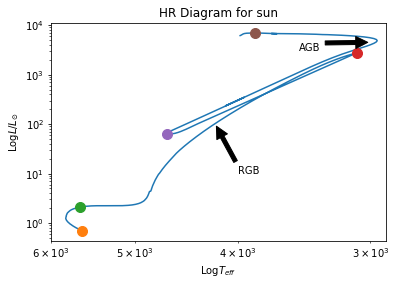

In [6]:
LSUN = 3.83E26
RSUN = 6.96E8
SIGMA = 5.67E-8

L = 10**sunH['log_L']*LSUN
R = 10**sunH['log_R']*RSUN
Teff = (L/(4*np.pi*R**2*SIGMA))**0.25

plt.plot(Teff, L/LSUN)
plt.xscale('log')
plt.yscale('log')
plt.xlim(6e3, 2.9e3)
plt.xlabel(r'Log$T_{eff}$')
plt.ylabel(r'Log$L/L_{\odot}$')
plt.title('HR Diagram for sun')

plt.plot(Teff[0], L[0]/LSUN, marker='o', markersize=10) #Beginning of main sequence, orange
plt.plot(Teff[144], L[144]/LSUN, marker='o', markersize=10) #End of main sequence, green
plt.plot(Teff[511], L[511]/LSUN, marker='o', markersize=10) #Tip of RGB, red
plt.plot(Teff[613], L[613]/LSUN, marker='o', markersize=10) #Halfway through horizontal branch, purple
plt.plot(Teff[891], L[891]/LSUN, marker='o', markersize=10) #Tip of AGB, brown

plt.annotate('RGB', xy=(4200, 100), xytext=(4000, 10), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('AGB', xy=(3000, 4500), xytext=(3500, 3000), arrowprops=dict(facecolor='black', shrink=0.05))


plt.show()

In [7]:
#This iterated through the mass fraction until the value became lower than 0.7, then printed its index 
X_c = sunH['X_c'] 

for i in range(930):
    loopVariable = X_c[i]
    if 0.7 < loopVariable:
        index = i
    else:
        index = i
        break
        
print(index)
print(X_c[index])

0
0.698287816


In [8]:
#This did the same as the last but for a value of 0
for i in range(930):
    loopVariable = X_c[i]
    if 0 < loopVariable:
        index = i
    else:
        index = i
        break
        
print(index)
print(X_c[index])

144
0.0


In [9]:
#This looked for the helium flash
L_3a = sunH['L_3a']

mx = 0

for i in range(0,600): #The cap was put on index before the end because the luminosity rises exponentially at the end, letting flash become the max
    loopVariable = L_3a[i]
    if mx < loopVariable:
        index = i
        mx = L_3a[i]
        
print(index)
print(L_3a[index])

511
77292.5364


In [10]:
#This was the same as the first two iterations
Y_c = sunH['Y_c']

for i in range(300,930): #this range because the value goes up in the first few steps, by starting in the middle it skips that
    loopVariable = Y_c[i]
    if 0.5 < loopVariable:
        index = i
    else:
        index = i
        break
        
print(index)
print(Y_c[index])

613
0.496914789


In [11]:
#This was the same iteration procedure as for the helium flash, but with no cap and for the general luminosity
MX = 0

for i in range(930):
    loopVariable = L[i]
    if MX < loopVariable:
        index = i
        MX = L[i]
        
print(index)
print(L[index])

891
2.65268910677e+30
